<a href="https://colab.research.google.com/github/dsanmartin/ELE050-B/blob/main/07_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Valores y vectores propios

\begin{equation}
  A\mathbf{v}=\lambda\mathbf{v}
\end{equation}

In [45]:
n = 100
A = np.random.rand(n, n)

In [46]:
vals, vecs = np.linalg.eigh(A)

La variable `vals` contiene los valores propios $\lambda_1, \dots, \lambda_n$ y `vecs` contiene los vectores propios $\mathbf{v}_1, \dots, \mathbf{v}_n$. Podemos reconstruir la matriz $A$ con

\begin{equation}
  A = V \Lambda V^{-1},
\end{equation}

con $V=(\mathbf{v}_1, \dots, \mathbf{v}_n)$. Esta matriz es unitaria, por lo que

\begin{equation}
  V^{-1}V = VV^{-1}=I
\end{equation}

In [47]:
Id_mat = vecs @ np.linalg.inv(vecs)

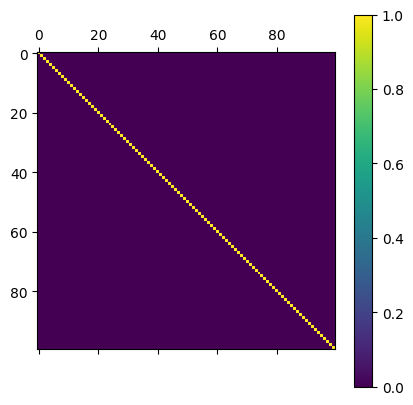

In [48]:
import matplotlib.pyplot as plt
plt.matshow(Id_mat)
plt.colorbar()
plt.show()

In [49]:
Lamb = np.zeros((n, n)) # Creación de \Lambda
for i in range(n):
    Lamb[i, i] = vals[i]

In [50]:
A_rec = vecs @ Lamb @ np.linalg.inv(vecs)

In [51]:
# Mostrar las primeas 5 filas
for i in range(5):
  print(i)
  # Mostrar los primeros 4 componentes
  print(A[i,:4])
  print(A_rec[i,:4])

0
[0.81630986 0.20503751 0.11525095 0.97066367]
[0.81630986 0.53041001 0.55929538 0.85915938]
1
[0.53041001 0.51077327 0.19774837 0.72622055]
[0.53041001 0.51077327 0.72631881 0.13699495]
2
[0.55929538 0.72631881 0.39152186 0.90198531]
[0.55929538 0.72631881 0.39152186 0.01342803]
3
[0.85915938 0.13699495 0.01342803 0.51989169]
[0.85915938 0.13699495 0.01342803 0.51989169]
4
[0.87365844 0.45923229 0.42520101 0.66506831]
[0.87365844 0.45923229 0.42520101 0.66506831]


# Reducción de dimensionalidad

In [52]:
data = load_digits()

In [56]:
X = data.data

In [60]:
X[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

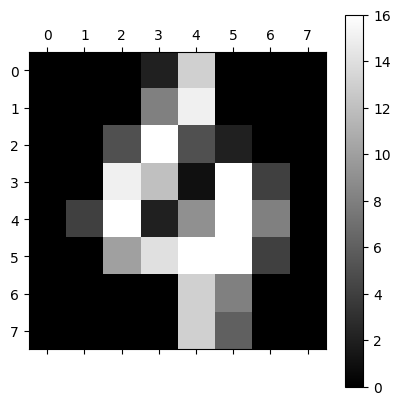

In [59]:
plt.matshow(X[100].reshape(8, 8), cmap='gray')
plt.colorbar()
plt.show()

In [61]:
X_scaled = StandardScaler().fit_transform(X)

In [62]:
data_pca = PCA(n_components=2).fit_transform(X_scaled)

In [65]:
data_tsne = TSNE(n_components=2).fit_transform(X_scaled)

In [82]:
ae = MLPRegressor(hidden_layer_sizes=(2, ), max_iter=1000).fit(X_scaled, X_scaled)

In [83]:
W = ae.coefs_[0]
b = ae.intercepts_[0]

In [84]:
data_ae = np.maximum(0, X_scaled @ W) + b

In [85]:
#data_ae.shape

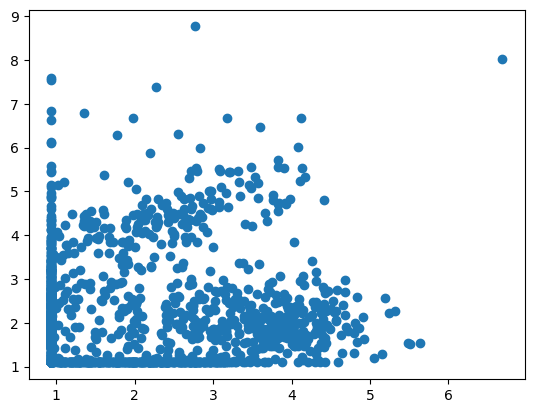

In [87]:
#plt.scatter(data_pca[:, 0], data_pca[:, 1])
#plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data.target, cmap="jet")
plt.scatter(data_ae[:, 0], data_ae[:, 1])
#plt.colorbar()
plt.show()

In [68]:
data.target.shape

(1797,)

In [98]:
data_pca_2 = PCA(n_components=25).fit_transform(X_scaled)
data_tsne_2 = TSNE(n_components=25, method='exact').fit_transform(X_scaled)

7


<ipython-input-96-3341379f51c3>:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x400 with 0 Axes>

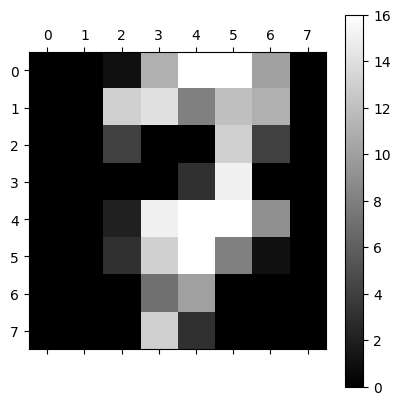

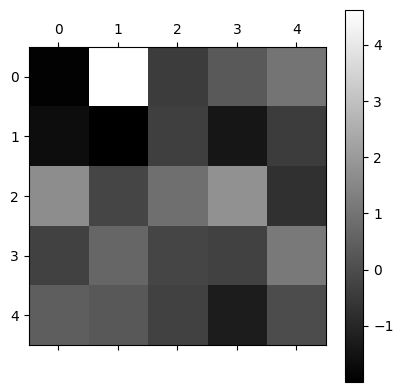

In [96]:
n = 300
print(data.target[n])
plt.figure(figsize=(12, 4))
#plt.subplot(1, 2, 1)
plt.matshow(X[n].reshape(8, 8), cmap="gray")
plt.colorbar()
#plt.subplot(1, 2, 2)
plt.matshow(data_pca_2[n].reshape(5, 5), cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()